# Sentiment Analysis of Bitcoin Tweets ₿
#### This project is about sentiment analysis of Bitcoin tweets. It aims to gather tweets related to Bitcoin and analyze them to determine the public's sentiment towards the cryptocurrency. This can be achieved by using natural language processing techniques to classify tweets as positive, negative, or neutral. By understanding the overall sentiment, it is possible to gain insights into how people feel about Bitcoin and potentially predict its future trends.
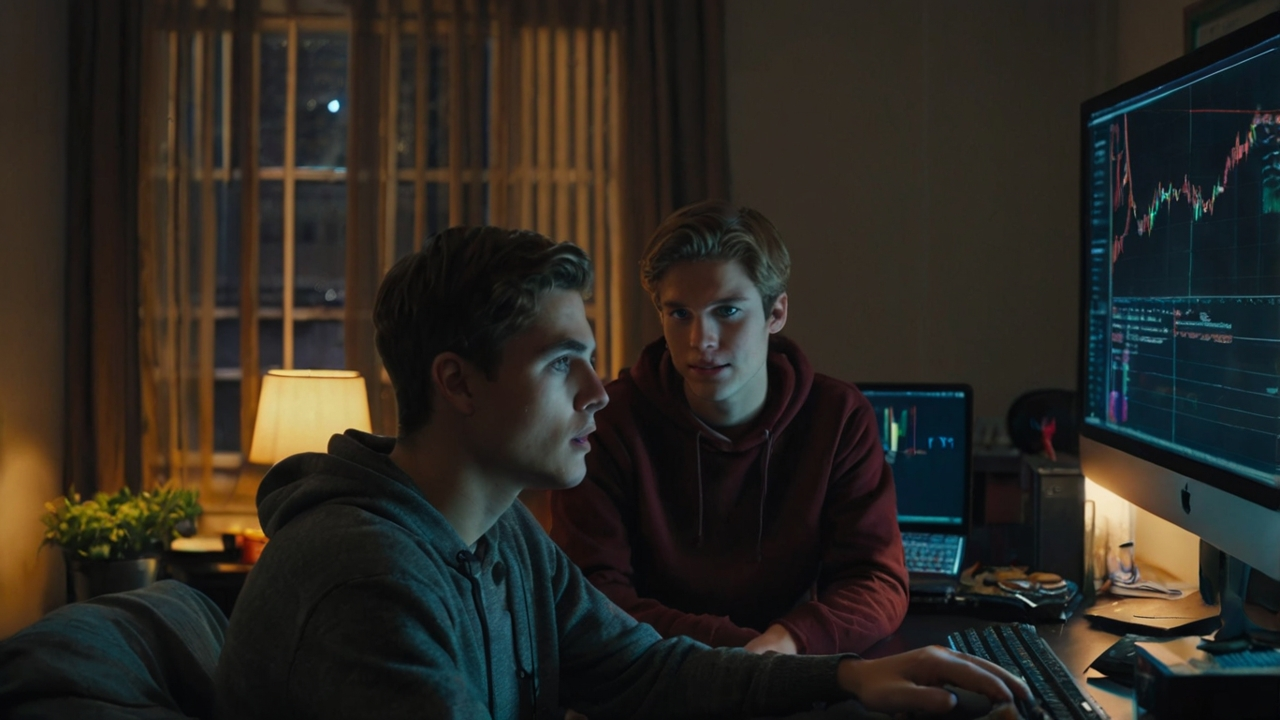

# We need some data!
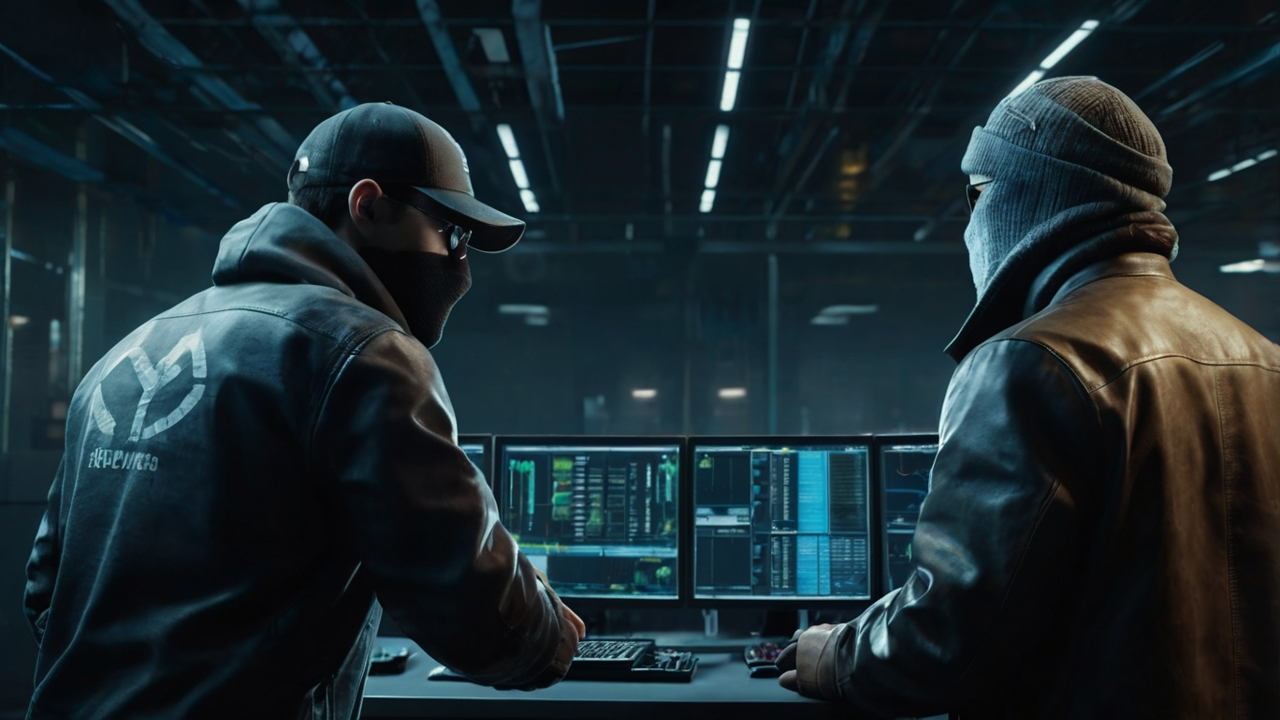

In [ ]:
import pandas as pd

splits = {'train': 'data/train-00000-of-00001-cc8461398e266567.parquet', 'test': 'data/test-00000-of-00001-922aa10406034550.parquet', 'eval': 'data/eval-00000-of-00001-dc793d916ae447cb.parquet'}
df = pd.read_parquet("hf://datasets/ckandemir/bitcoin_tweets_sentiment_kaggle/" + splits["train"])
df.head()

,Date,text,Sentiment
0,2019-06-12,Are you interested in Bitcoin mining for FREE!...,Positive
1,2019-07-08,"QA Analyst - IT Services Company ( WESTBURY, U...",Positive
2,2019-05-22,🌍22/05/2019🌍\nA Abakus a qual a NovaDAX perten...,Negative
3,2019-05-16,@Quark_Chain #QKC #Blockchain #BTC #ETH #block...,Negative
4,2018-07-21,"July 21, 2018 04:00 AM EDT\nLast 4 hours, BTC ...",Positive


# Text cleaning
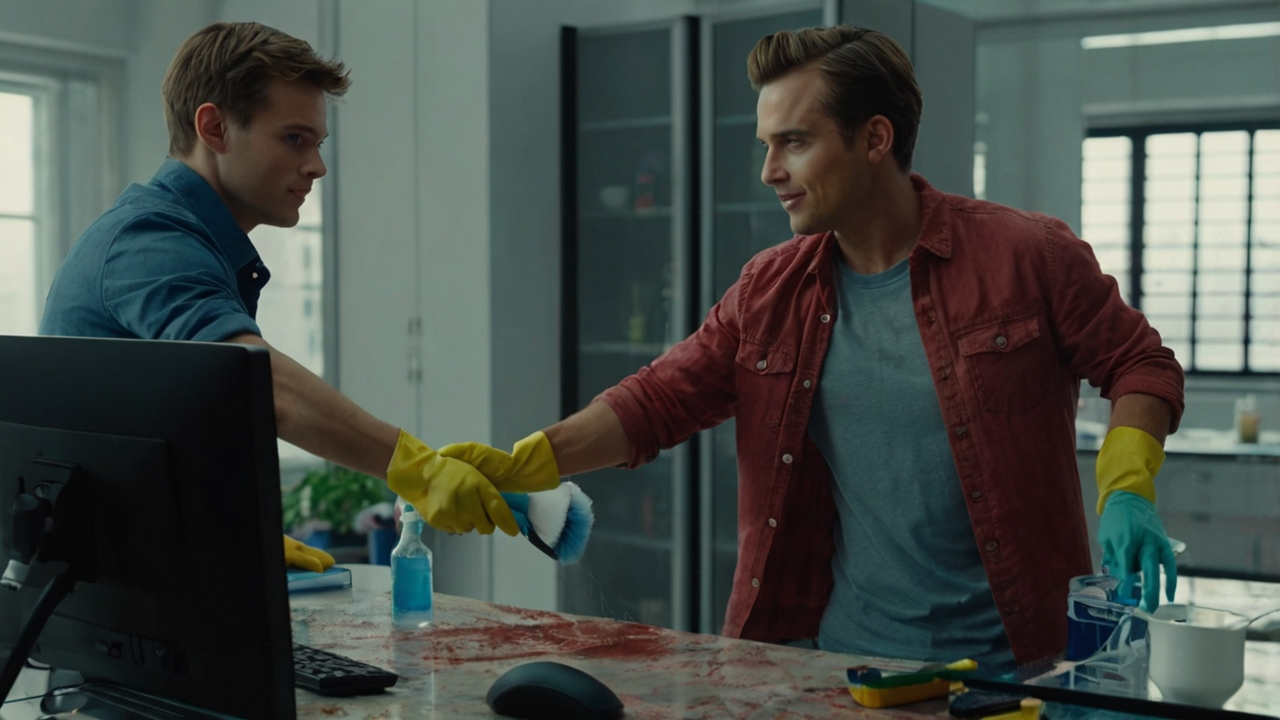

In [ ]:
# Lower case

df["text"] = df["text"].apply(lambda x: x.lower())
df.head()

,Date,text,Sentiment
0,2019-06-12,are you interested in bitcoin mining for free!...,Positive
1,2019-07-08,"qa analyst - it services company ( westbury, u...",Positive
2,2019-05-22,🌍22/05/2019🌍\na abakus a qual a novadax perten...,Negative
3,2019-05-16,@quark_chain #qkc #blockchain #btc #eth #block...,Negative
4,2018-07-21,"july 21, 2018 04:00 am edt\nlast 4 hours, btc ...",Positive


In [ ]:
# Remove white spaces

from tqdm.notebook import tqdm

def remove_extra_whitespace(text):
  """Removes leading/trailing whitespace and replaces multiple spaces with single spaces."""
  text = text.strip()
  text = " ".join(text.split())
  return text

# Apply the function to the 'text' column with a progress bar
df['text'] = [remove_extra_whitespace(text) for text in tqdm(df['text'], desc="Cleaning texts")]

Cleaning texts:   0%|          | 0/77791 [00:00<?, ?it/s]

In [ ]:
# Remove special characters

import re

def remove_special_characters(text):
  """Removes special characters from the text."""
  text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
  return text

# Apply the function to the 'text' column with a progress bar
df['text'] = [remove_special_characters(text) for text in tqdm(df['text'], desc="Removing special characters")]
df.head()

Removing special characters:   0%|          | 0/77791 [00:00<?, ?it/s]

,Date,text,Sentiment
0,2019-06-12,are you interested in bitcoin mining for free ...,Positive
1,2019-07-08,qa analyst it services company westbury unit...,Positive
2,2019-05-22,22052019 a abakus a qual a novadax pertence fo...,Negative
3,2019-05-16,quarkchain qkc blockchain btc eth blockchainte...,Negative
4,2018-07-21,july 21 2018 0400 am edt last 4 hours btc 066 ...,Positive


In [ ]:
from bs4 import BeautifulSoup

def remove_html_tags(text):
  """Removes HTML tags from the text."""
  soup = BeautifulSoup(text, "html.parser")
  return soup.get_text()

# Apply the function to the 'text' column with a progress bar
df['text'] = [remove_html_tags(text) for text in tqdm(df['text'], desc="Removing HTML tags")]
df.head()

Removing HTML tags:   0%|          | 0/77791 [00:00<?, ?it/s]

,Date,text,Sentiment
0,2019-06-12,are you interested in bitcoin mining for free ...,Positive
1,2019-07-08,qa analyst it services company westbury unit...,Positive
2,2019-05-22,22052019 a abakus a qual a novadax pertence fo...,Negative
3,2019-05-16,quarkchain qkc blockchain btc eth blockchainte...,Negative
4,2018-07-21,july 21 2018 0400 am edt last 4 hours btc 066 ...,Positive


In [ ]:
!pip install contractions

In [ ]:
import contractions

def expand_contractions(text):
  """Expands contractions in the text."""
  return contractions.fix(text)

# Apply the function to the 'text' column with a progress bar
df['text'] = [expand_contractions(text) for text in tqdm(df['text'], desc="Expanding contractions")]
df.head()

Expanding contractions:   0%|          | 0/77791 [00:00<?, ?it/s]

,Date,text,Sentiment
0,2019-06-12,are you interested in bitcoin mining for free ...,Positive
1,2019-07-08,qa analyst it services company westbury unit...,Positive
2,2019-05-22,22052019 a abakus a qual a novadax pertence fo...,Negative
3,2019-05-16,quarkchain qkc blockchain btc eth blockchainte...,Negative
4,2018-07-21,july 21 2018 0400 am edt last 4 hours btc 066 ...,Positive


In [ ]:
# Removing Punctuation

import nltk
import string

nltk.download('punkt')
from nltk.tokenize import word_tokenize

def remove_punctuation(text):
  """Removes punctuation from a string."""
  translator = str.maketrans('', '', string.punctuation)
  return text.translate(translator)


for i in tqdm(range(len(df))):
    df["text"][i] = remove_punctuation(df["text"][i])

df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


  0%|          | 0/77791 [00:00<?, ?it/s]

A streamkimeneten csak az utolsó 5000 sor látható.

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["text"][i] = remove_punctuation(df["text"][i])
<ipython-input-54-546311a48d3a>:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to per

,Date,text,Sentiment
0,2019-06-12,are you interested in bitcoin mining for free ...,Positive
1,2019-07-08,qa analyst it services company westbury unit...,Positive
2,2019-05-22,22052019 a abakus a qual a novadax pertence fo...,Negative
3,2019-05-16,quarkchain qkc blockchain btc eth blockchainte...,Negative
4,2018-07-21,july 21 2018 0400 am edt last 4 hours btc 066 ...,Positive


In [ ]:
# Remove Numbers

def remove_numbers(text):
  """Removes numbers from a string."""
  result = ''.join([i for i in text if not i.isdigit()])
  return result

df["text"] = [remove_numbers(text) for text in tqdm(df['text'], desc="Cleaning texts")]
df.head()

Cleaning texts:   0%|          | 0/77791 [00:00<?, ?it/s]

,Date,text,Sentiment
0,2019-06-12,are you interested in bitcoin mining for free ...,Positive
1,2019-07-08,qa analyst it services company westbury unit...,Positive
2,2019-05-22,a abakus a qual a novadax pertence foi seleci...,Negative
3,2019-05-16,quarkchain qkc blockchain btc eth blockchainte...,Negative
4,2018-07-21,july am edt last hours btc eth ltc xrp ...,Positive


In [ ]:
# Remove stop words

from nltk.corpus import stopwords
nltk.download('stopwords')

def remove_stopwords(text):
  """Removes stopwords from a string."""
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(text)
  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  return " ".join(filtered_sentence)

df["text"] = [remove_stopwords(text) for text in tqdm(df['text'], desc="Cleaning texts")]
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cleaning texts:   0%|          | 0/77791 [00:00<?, ?it/s]

,Date,text,Sentiment
0,2019-06-12,interested bitcoin mining free start already b...,Positive
1,2019-07-08,qa analyst services company westbury united st...,Positive
2,2019-05-22,abakus qual novadax pertence foi selecionada c...,Negative
3,2019-05-16,quarkchain qkc blockchain btc eth blockchainte...,Negative
4,2018-07-21,july edt last hours btc eth ltc xrp bch crypto...,Positive


In [ ]:
# Lemmatization

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

def lemmatize_text(text):
  """Lemmatizes words in a string."""
  lemmatizer = WordNetLemmatizer()
  word_tokens = word_tokenize(text)
  lemmatized_sentence = [lemmatizer.lemmatize(w) for w in word_tokens]
  return " ".join(lemmatized_sentence)

df["text"] = [lemmatize_text(text) for text in tqdm(df['text'], desc="Cleaning texts")]
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Cleaning texts:   0%|          | 0/77791 [00:00<?, ?it/s]

,Date,text,Sentiment
0,2019-06-12,interested bitcoin mining free start already b...,Positive
1,2019-07-08,qa analyst service company westbury united sta...,Positive
2,2019-05-22,abakus qual novadax pertence foi selecionada c...,Negative
3,2019-05-16,quarkchain qkc blockchain btc eth blockchainte...,Negative
4,2018-07-21,july edt last hour btc eth ltc xrp bch cryptof...,Positive


In [ ]:
# Delete the 3 useless "Neutral" rows

df = df[df["Sentiment"] != "Neutral"]

# Training, validation and test set

<img src="https://www.brainstobytes.com/content/images/2020/01/Sets.png">

In [ ]:
# Labeling

df['Sentiment'] = df['Sentiment'].map({'Positive': 1, 'Negative': 0})
df.head()

,Date,text,Sentiment
0,2019-06-12,interested bitcoin mining free start already b...,1
1,2019-07-08,qa analyst service company westbury united sta...,1
2,2019-05-22,abakus qual novadax pertence foi selecionada c...,0
3,2019-05-16,quarkchain qkc blockchain btc eth blockchainte...,0
4,2018-07-21,july edt last hour btc eth ltc xrp bch cryptof...,1


In [ ]:
# Train and test set

from sklearn.model_selection import train_test_split

# Split the data into training and temporary sets (80% train, 20% temp)
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)

# Split the temporary set into validation and test sets (50% validation, 50% test)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Now you have train_df, val_df, and test_df
print(f"Train set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")

Train set size: 62230
Validation set size: 7779
Test set size: 7779


In [ ]:
# CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = CountVectorizer(max_features=1000)

# Fit and transform the training data
train_df_cv = vectorizer.fit_transform(train_df['text']).toarray()

# Transform the validation and test data using the same vectorizer
val_df_cv = vectorizer.transform(val_df['text']).toarray()
test_df_cv = vectorizer.transform(test_df['text']).toarray()

In [ ]:
# TFIDF

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the training data
train_df_tfidf = tfidf_vectorizer.fit_transform(train_df['text'])

# Transform the validation and test data using the same vectorizer
val_df_tfidf = tfidf_vectorizer.transform(val_df['text'])
test_df_tfidf = tfidf_vectorizer.transform(test_df['text'])

In [ ]:
# Labels

train_df_labels = train_df['Sentiment'].values
val_df_labels = val_df['Sentiment'].values
test_df_labels = test_df['Sentiment'].values

# Modelling

<img src="https://images.spiceworks.com/wp-content/uploads/2022/04/11040521/46-4-e1715636469361.png">

In [ ]:
# Model CV

import tensorflow as tf

# Define the model
model_cv = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(train_df_cv.shape[1],))
])

# Compile the model
model_cv.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model_cv.fit(train_df_cv, train_df_labels, epochs=5, validation_data=(val_df_cv, val_df_labels))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1945/1945 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6008 - loss: 0.6606 - val_accuracy: 0.6059 - val_loss: 0.6223
Epoch 2/5
1945/1945 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6270 - loss: 0.6087 - val_accuracy: 0.6196 - val_loss: 0.6037
Epoch 3/5
1945/1945 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6303 - loss: 0.5947 - val_accuracy: 0.6124 - val_loss: 0.5946
Epoch 4/5
1945/1945 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6373 - loss: 0.5819 - val_accuracy: 0.6192 - val_loss: 0.5884
Epoch 5/5
1945/1945 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6369 - loss: 0.5772 - val_accuracy: 0.6196 - val_loss: 0.5856


In [ ]:
# Model CV

import tensorflow as tf

# Define the model
model_tfidf = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(train_df_cv.shape[1],))
])

# Compile the model
model_tfidf.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model_tfidf.fit(train_df_cv, train_df_labels, epochs=5, validation_data=(val_df_cv, val_df_labels))

Epoch 1/5
1945/1945 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5992 - loss: 0.6619 - val_accuracy: 0.6174 - val_loss: 0.6224
Epoch 2/5
1945/1945 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6258 - loss: 0.6094 - val_accuracy: 0.6095 - val_loss: 0.6043
Epoch 3/5
1945/1945 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6294 - loss: 0.5949 - val_accuracy: 0.6145 - val_loss: 0.5947
Epoch 4/5
1945/1945 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6388 - loss: 0.5821 - val_accuracy: 0.6201 - val_loss: 0.5888
Epoch 5/5
1945/1945 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6390 - loss: 0.5782 - val_accuracy: 0.6187 - val_loss: 0.5856


In [ ]:
# Evaluate the model on the test set
loss_cv, accuracy_cv = model_cv.evaluate(test_df_cv, test_df_labels)
print('Test accuracy (CV):', accuracy_cv)

loss_tfidf, accuracy_tfidf = model_tfidf.evaluate(test_df_tfidf, test_df_labels)
print('Test accuracy (TFIDF):', accuracy_tfidf)

244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6118 - loss: 0.5937
Test accuracy (CV): 0.6129322648048401
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6013 - loss: 0.5975
Test accuracy (TFIDF): 0.6041907668113708


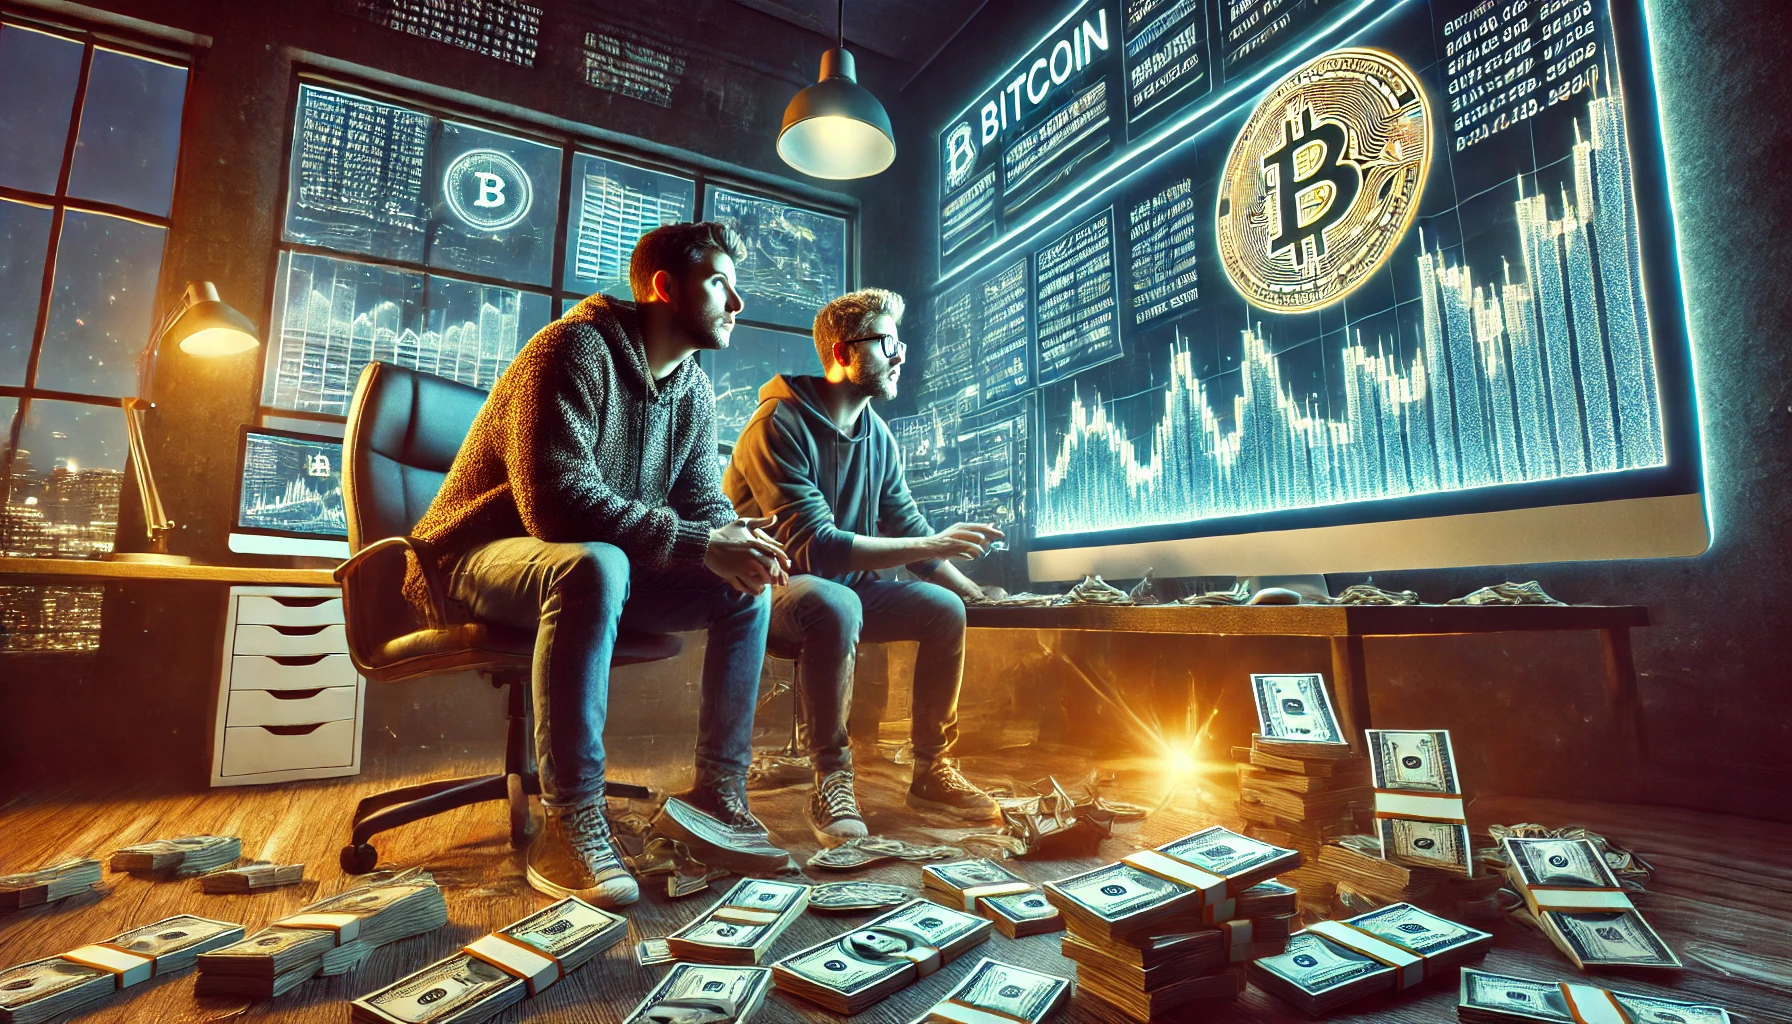

# Comparison Between Bitcoin Price and Tweet Sentiment

In [ ]:
# Create a copy of the DataFrame
df_copy = df.copy()

# Extract the year from the 'Date' column
df_copy['Year'] = pd.to_datetime(df_copy['Date']).dt.year

# Select only the 'Year' and 'Sentiment' columns
df_copy = df_copy[['Year', 'Sentiment']]

# Now df_copy contains only the 'Year' and 'Sentiment' columns
df_copy.head()

,Year,Sentiment
0,2019,1
1,2019,1
2,2019,0
3,2019,0
4,2018,1


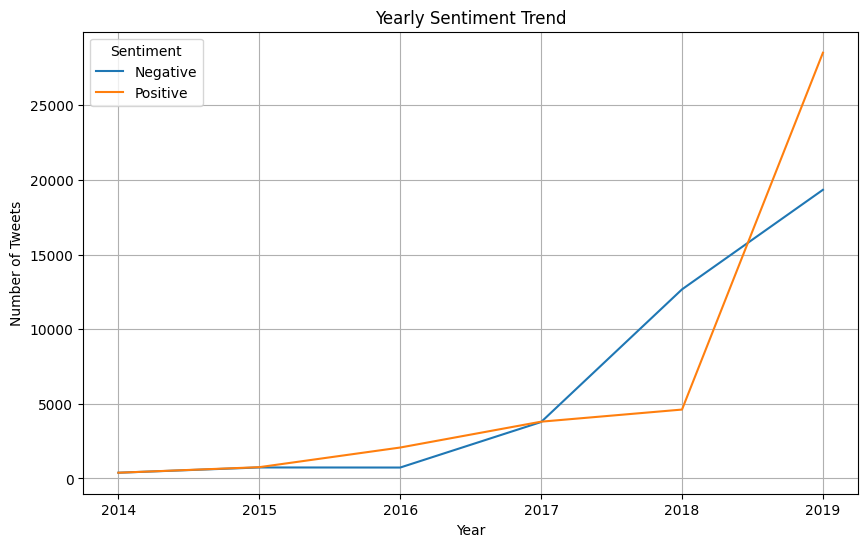

In [ ]:
import matplotlib.pyplot as plt

# Group the data by year and count the number of positive and negative sentiments
sentiment_counts = df_copy.groupby('Year')['Sentiment'].value_counts().unstack()

# Create the line plot
sentiment_counts.plot(kind='line', figsize=(10, 6))

# Customize the plot
plt.title('Yearly Sentiment Trend')
plt.xlabel('Year')
plt.ylabel('Number of Tweets')
plt.legend(title='Sentiment', labels=['Negative', 'Positive'])
plt.grid(True)
plt.show()

# Bitcoin's price during this time period
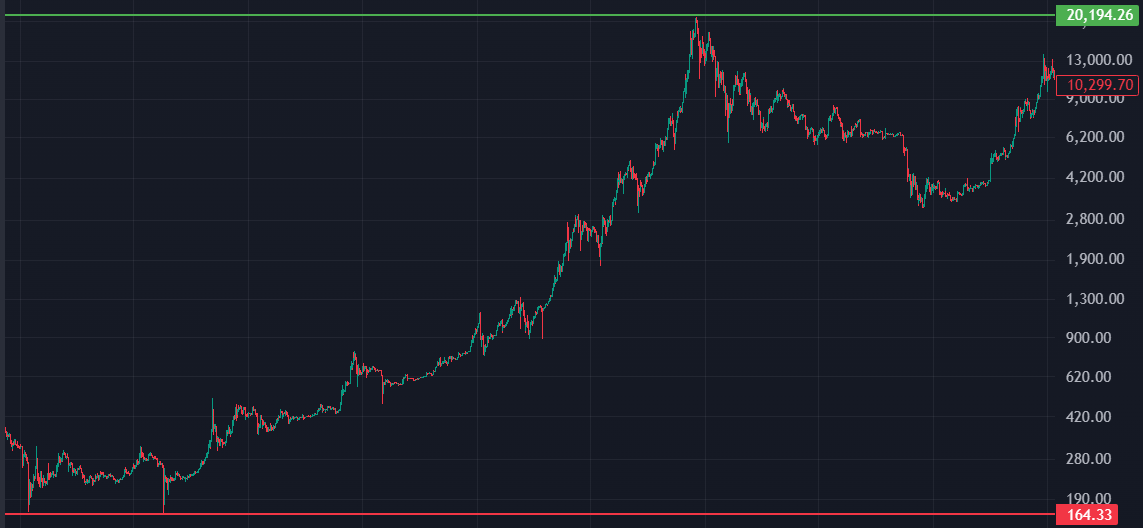